# Group Assignment #3

Reviewing and improving upon past assignments to better understanding by using project specific datasets. Exploring these datasets to better understand what they are like and how they can be incorporated into the project.

# Importing Libraries

In [3]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# 
import matplotlib.pyplot as plt

import os

# Importing Testing Locations Data 

In [3]:
# loading data file
gdf = gpd.read_file('GISCorps_COVID-19_Testing_Locations_in_the_United_States_Symbolized_by_Status.geojson')

# Preliminary Inspection

In [4]:
gdf.shape

(36134, 50)

In [5]:
gdf.sample()

,OBJECTID,facilityid,name,fulladdr,municipality,agency,agencytype,phone,agencyurl,operhours,...,filter,minimum_age,Same_Day_Results,take_home_test,Wheelchair_Accessible,Accessibility_Support,offers_vaccine,vaccine_url,minimum_age_vaccine,geometry
16684,25919,4772,Lone Star Community Health Center - Grangerland,"13905 Grangerland Rd, Conroe, TX 77306-7809",Conroe,"LONE STAR COMMUNITY HEALTH CENTER, INC",FQHC,936-539-4004,http://www.lonestarfamily.org,None,...,FQHC,NaN,None,No,Unknown,Unknown,Unk,None,NaN,POINT (-95.31980 30.24942)


In [6]:
# looking at the data types
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36134 entries, 0 to 36133
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OBJECTID                 36134 non-null  int64   
 1   facilityid               12178 non-null  object  
 2   name                     36128 non-null  object  
 3   fulladdr                 36120 non-null  object  
 4   municipality             34493 non-null  object  
 5   agency                   33201 non-null  object  
 6   agencytype               33723 non-null  object  
 7   phone                    26884 non-null  object  
 8   agencyurl                35716 non-null  object  
 9   operhours                29859 non-null  object  
 10  comments                 25665 non-null  object  
 11  Instructions             27610 non-null  object  
 12  numvehicles              451 non-null    float64 
 13  testcapacity             1861 non-null   float64 
 14

In [7]:
gdf.head()

,OBJECTID,facilityid,name,fulladdr,municipality,agency,agencytype,phone,agencyurl,operhours,...,filter,minimum_age,Same_Day_Results,take_home_test,Wheelchair_Accessible,Accessibility_Support,offers_vaccine,vaccine_url,minimum_age_vaccine,geometry
0,2,None,"Legacy Community Health, Fifth Ward","3811 Lyons Ave., Houston, TX 77020",Houston,Legacy Community Health,Private,8325485400,https://www.legacycommunityhealth.org/,"M-F, 8am - 5pm",...,None,NaN,None,No,Unknown,Unknown,Unk,None,NaN,POINT (-95.33168 29.77610)
1,7,None,United Memorial Medical Center - Tidwell,"510 W Tidwell Rd, Houston, TX, 77091",Houston,United Memorial Medical Center,Private,281-618-8500,https://www.ummcscreening.com/testing-locations,"M-F, 8 a.m. – 3 p.m.",...,None,NaN,No,No,NA,Unknown,Unk,None,NaN,POINT (-95.40816 29.84786)
2,8,None,Legacy Bissonnett,"12667 Bissonnet St, Houston, TX, 77099",Houston,Legacy Community Health,Private,8325485000,https://www.legacycommunityhealth.org/,None,...,None,NaN,None,No,Unknown,Unknown,Unk,None,NaN,POINT (-95.60144 29.67757)
3,11,None,Legacy Deer Park,"3430 Center., Deer Park, TX",Deer Park,Legacy Community Health,Private,281-628-2040,https://www.legacycommunityhealth.org/,"M-F, 8am - 5pm",...,None,NaN,None,No,Unknown,Unknown,Unk,None,NaN,POINT (-95.12343 29.68082)
4,12,None,Legacy Branard,"401 Branard St., Houston, TX 77006",Houston,Legacy Community Health,Private,713-366-7444,https://www.legacycommunityhealth.org/,None,...,None,NaN,None,No,Unknown,Unknown,Unk,None,NaN,POINT (-95.38472 29.73649)


In [8]:
list(gdf)

['OBJECTID',
 'facilityid',
 'name',
 'fulladdr',
 'municipality',
 'agency',
 'agencytype',
 'phone',
 'agencyurl',
 'operhours',
 'comments',
 'Instructions',
 'numvehicles',
 'testcapacity',
 'status',
 'CreationDate',
 'EditDate',
 'Vetted',
 'drive_through',
 'appt_only',
 'referral_required',
 'services_offered_onsite',
 'call_first',
 'virtual_screening',
 'health_dept_url',
 'State',
 'GlobalID',
 'data_source',
 'county',
 'red_flag',
 'vol_note',
 'public_form',
 'start_date',
 'end_date',
 'type_of_test',
 'test_processing',
 'fine_print',
 'vehicle_required',
 'facility_type',
 'Outside_FID',
 'filter',
 'minimum_age',
 'Same_Day_Results',
 'take_home_test',
 'Wheelchair_Accessible',
 'Accessibility_Support',
 'offers_vaccine',
 'vaccine_url',
 'minimum_age_vaccine',
 'geometry']

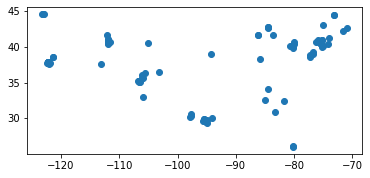

In [13]:
gdf.head(100).plot()

# Importing State Policy Data

In [14]:
statepolicy = pd.read_csv('state_policy_data.csv')

# Preliminary Inspection

In [15]:
statepolicy.shape

(3808, 10)

In [16]:
statepolicy.sample()

,state_id,county,fips_code,policy_level,date,policy_type,start_stop,comments,source,total_phases
457,NC,Clay County,37043.0,county,2020-03-24,Shelter in Place,start,Clay County Policy Start,wikidata,NaN


In [17]:
statepolicy.head()

,state_id,county,fips_code,policy_level,date,policy_type,start_stop,comments,source,total_phases
0,HI,NaN,NaN,state,2020-05-18,Manufacturing,start,"Policy_Details: Open with adjusted ""Safe Pract...",sip_submission_form: https://governor.hawaii.g...,NaN
1,TX,Kinney,48271.0,county,2020-07-03,Mask Requirement,start,Policy_Details: County is approved to be exemp...,sip_submission_form: https://tdem.texas.gov/ga...,NaN
2,ID,Custer,16037.0,county,2020-10-27,Phase 3,start,Policy_Details: No greater than 50 people at i...,sip_submission_form: https://coronavirus.idaho...,4.0
3,UT,Wayne,49055.0,county,2020-11-24,Phase 1,start,Policy_Details: Restrictions for highest level...,sip_submission_form: https://coronavirus.utah....,3.0
4,TX,Borden,48033.0,county,2020-07-03,Mask Requirement,start,Policy_Details: County is approved to be exemp...,sip_submission_form: https://tdem.texas.gov/ga...,NaN


In [18]:
list(statepolicy)

['state_id',
 'county',
 'fips_code',
 'policy_level',
 'date',
 'policy_type',
 'start_stop',
 'comments',
 'source',
 'total_phases']

In [19]:
statepolicy.policy_type.value_counts()

Shelter in Place            859
Food and Drink              310
Non-Essential Businesses    268
Mask Requirement            265
Outdoor and Recreation      260
                           ... 
construction                  1
training jobs                 1
Agriculture                   1
Quarantine                    1
Election                      1
Name: policy_type, Length: 65, dtype: int64

In [24]:
# create a new variable of building counts and put it in a dataframe
statepolicy_typecount = statepolicy.policy_type.value_counts().reset_index()
statepolicy_typecount

,index,policy_type
0,Shelter in Place,859
1,Food and Drink,310
2,Non-Essential Businesses,268
3,Mask Requirement,265
4,Outdoor and Recreation,260
...,...,...
60,construction,1
61,training jobs,1
62,Agriculture,1
63,Quarantine,1


In [34]:
statepolicy_typecount.head(20)

,index,policy_type
0,Shelter in Place,859
1,Food and Drink,310
2,Non-Essential Businesses,268
3,Mask Requirement,265
4,Outdoor and Recreation,260
5,Entertainment,204
6,Childcare (K-12),199
7,Phase 2,141
8,Houses of Worship,122
9,Phase 3,118


In [31]:
statepolicy.state_id.value_counts()

TX    326
MS    302
UT    250
NE    247
ID    180
ND    139
CA    129
MO    125
PA    122
CO     95
MI     95
ME     79
OH     79
GA     74
NY     73
FL     71
KS     69
IL     69
AK     68
IN     66
OR     61
NC     58
IA     51
AZ     46
HI     40
KY     40
VA     40
WV     39
CT     38
NM     38
MN     38
LA     38
WI     37
NH     36
RI     36
MA     36
AL     36
WA     35
VT     34
TN     34
NJ     32
DE     32
DC     30
MD     29
MT     28
AR     27
SC     26
WY     26
OK     24
NV     23
VI     16
GU     16
PR     12
SD     10
MP      8
Name: state_id, dtype: int64

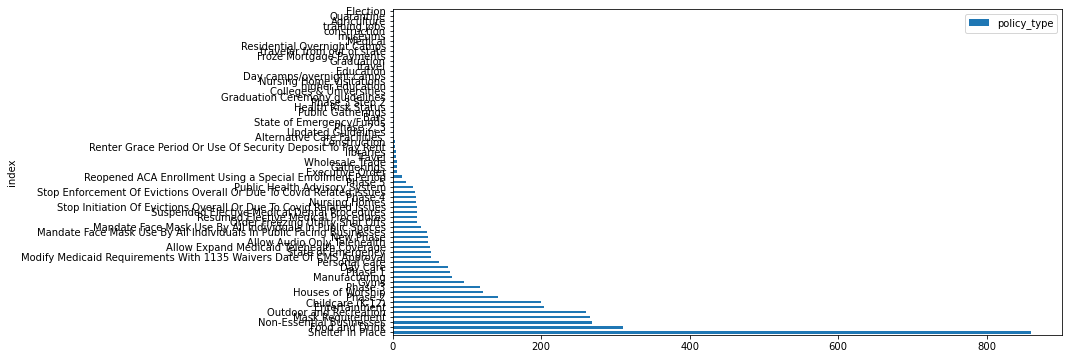

In [33]:
statepolicy_typecount.plot.barh(figsize=(12,6),
                                x='index')

In [43]:
statepolicy[statepolicy['fips_code'] == 6037.0].sample()

,state_id,county,fips_code,policy_level,date,policy_type,start_stop,comments,source,total_phases
2436,CA,Los Angeles County,6037.0,county,2020-03-21,Shelter in Place,start,Los Angeles County Policy Start,wikidata,NaN


In [51]:
statepolicy[statepolicy['county'] == 'Los Angeles County'].head()

,state_id,county,fips_code,policy_level,date,policy_type,start_stop,comments,source,total_phases
2436,CA,Los Angeles County,6037.0,county,2020-03-21,Shelter in Place,start,Los Angeles County Policy Start,wikidata,NaN


In [52]:
statepolicy[statepolicy['state_id'] == 'CA'].head()

,state_id,county,fips_code,policy_level,date,policy_type,start_stop,comments,source,total_phases
8,CA,Ventura,6111.0,county,2020-11-16,Food and Drink,start,Policy_Details: Restaurants and bars/breweries...,sip_submission_form: https://www.venturacounty...,NaN
26,CA,NaN,NaN,state,2020-03-23,Modify Medicaid Requirements With 1135 Waivers...,start,Other measures and details for this policy inc...,BU COVID-19 State Policy Database,NaN
33,CA,Stanislaus,6099.0,county,2020-11-16,Non-Essential Businesses,start,Policy_Details: All non-essential businesses a...,sip_submission_form: http://schsa.org/coronavi...,NaN
52,CA,Alameda,6001.0,county,2020-06-08,Phase 2,start,Policy_Details: Small outdoor gatherings are p...,sip_submission_form: http://www.acphd.org/medi...,NaN
63,CA,NaN,NaN,state,2020-05-08,Entertainment,start,Policy_Details: Stage 2 allows gradual reopeni...,sip_submission_form: https://www.gov.ca.gov/wp...,NaN


# Importing State Level Covid Data

In [53]:
state_covidlevels = pd.read_csv('state level cases and deaths since jan2020 .csv')

In [54]:
state_covidlevels.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [61]:
#looking at dates 2020-06-01 to 2020-08-31 --> summer/june to august
state_covidlevels[state_covidlevels['date'] >= '2020-06-01'].head()

,date,state,fips,cases,deaths
4964,2020-06-01,Alabama,1,18534,646
4965,2020-06-01,Alaska,2,476,8
4966,2020-06-01,Arizona,4,20123,918
4967,2020-06-01,Arkansas,5,7443,133
4968,2020-06-01,California,6,115643,4287


# OSM Area of Interest 

In [30]:
# location
address = 'Dallas, Dallas County, Texas, United States'

# tags for what type of data we are getting
tags = {'building':True}

# distance from location point in meters
dist = 1000

In [31]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM 
osm = ox.geometries_from_address(address,
                                 tags=tags,
                                 dist=dist)

CPU times: user 269 ms, sys: 9.06 ms, total: 278 ms
Wall time: 4.02 s


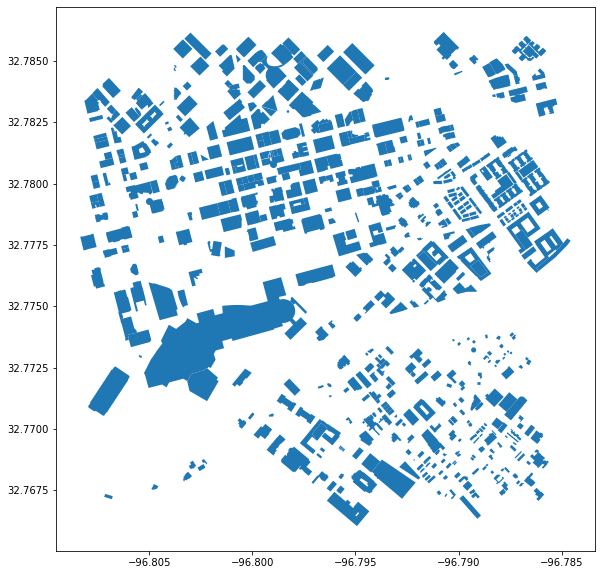

In [32]:
# quick plot
osm.plot(figsize=(10,10))

In [33]:
# show me 10 random rows
osm.sample(5)

,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,building,...,note,ownership,historic,internet_access:fee,level,official_name,ways,building_1,type,designation
32,way/28182729,28182729,way,NaN,1201,NaN,NaN,Elm Street,NaN,commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,way/450893372,450893372,way,Dallas,1505,75201,TX,Elm Street,NaN,apartments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,way/450893374,450893374,way,NaN,NaN,NaN,NaN,NaN,NaN,retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,way/724750337,724750337,way,NaN,NaN,NaN,NaN,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,way/471953144,471953144,way,NaN,NaN,NaN,NaN,NaN,NaN,commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Get a full list of columns
#list(osm)

In [37]:
# if you have a looooot of columns, add the argument verbose=True
#osm.info(verbose=True, null_counts=True)

In [34]:
osm.building.value_counts()

commercial       162
yes              137
terrace           49
apartments        48
public            30
warehouse         29
parking           22
retail            21
house             21
residential       14
hotel             10
industrial         9
church             7
roof               7
school             4
office             4
medium             4
civic              3
small              2
garage             2
college            1
train_station      1
chapel             1
service            1
car_repair         1
Name: building, dtype: int64

In [35]:
# replace 'yes'
osm.loc[osm['building']=='yes','building'] = 'unassigned'
osm.sample(5)

,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,building,...,note,ownership,historic,internet_access:fee,level,official_name,ways,building_1,type,designation
397,way/471965564,471965564,way,NaN,NaN,NaN,NaN,NaN,NaN,retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/26470085,26470085,way,NaN,NaN,NaN,NaN,NaN,NaN,unassigned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,way/179235581,179235581,way,NaN,NaN,NaN,NaN,NaN,NaN,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,way/361437891,361437891,way,NaN,NaN,NaN,NaN,NaN,NaN,unassigned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,way/28015788,28015788,way,NaN,308,NaN,NaN,South Akard Street,NaN,commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


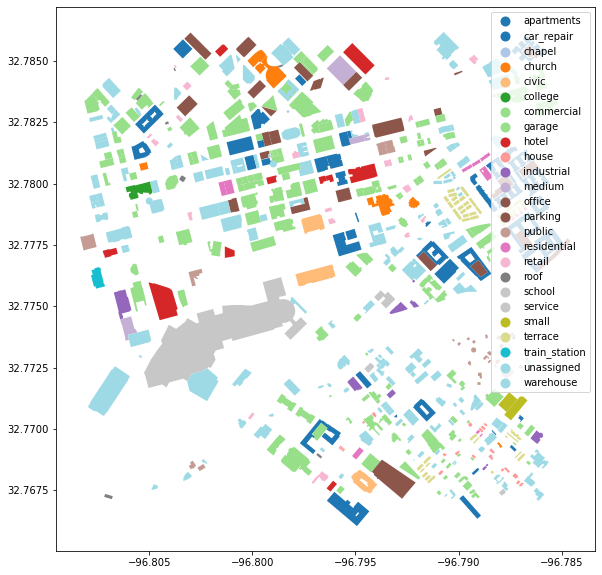

In [36]:
#plotting by building color 
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

In [38]:
# here is the function, summarizing everything learned today and put into function
# notice how everything is indented after def
def make_building_map(location = 'Los Angeles, USA', distance = 1000): #adding dist argument
    
    # get the data from osm
    osm = ox.geometries_from_address(location,
                                     tags={'building':True},
                                     dist=distance) #added here too
    
    # reproject to Web Mercator so we can use basemap
    osm_web_mercator = osm.to_crs(epsg=3857)
    
    # set up the plot
    fig, ax = plt.subplots(figsize=(10,10))
    
    # create the map
    osm_web_mercator.plot(ax=ax,
                          figsize=(10,10),
                          column='building',
                          cmap='tab20',
                          legend=True,
                          legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})
    
    # add a title
    ax.set_title('Building types in ' + location)

    # get rid of the axis
    ax.axis('off')
    
    # add a dark basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

CPU times: user 1.15 s, sys: 244 ms, total: 1.39 s
Wall time: 5.2 s


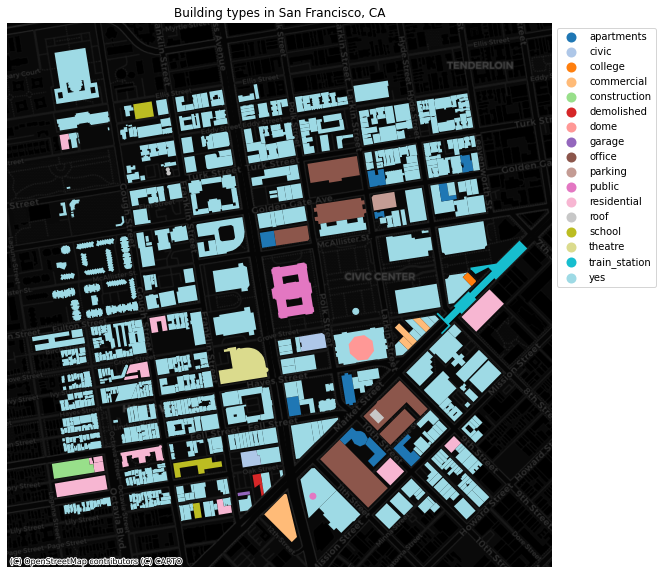

In [39]:
%%time
# run the function once
make_building_map('San Francisco, CA', distance = 500) #or type (Paris, 200) and itll work
#what this means: i can create my own library and create functions that i can then call to throughout project 